In [1]:
# Load Trees

import pickle
def extract_spcode(nodename):
    return nodename.split('.')[0]

all_trees = pickle.load(open('data/alltrees.pkl', 'rb'))
print("Trees loaded:", len(all_trees))

Trees loaded: 2601


# Identify gene duplication events

## Relevant documentation: 

- [Detecting evolutionary events](http://etetoolkit.org/docs/latest/tutorial/tutorial_phylogeny.html#detecting-evolutionary-events)
- [Tree rooting](http://etetoolkit.org/docs/latest/tutorial/tutorial_trees.html#tree-rooting)
- [Standarizing topology](http://etetoolkit.org/docs/latest/reference/reference_tree.html?highlight=standardize#ete3.TreeNode.standardize)



### TASK: Root all trees to midpoint, and label nodes as duplication or speciation events


In [2]:
# Root all trees to midpoint, and label nodes as duplication or speciation events
for tname, t in all_trees.items():
    t.standardize() # Let's resolve artifically all multifurcations (as 0-distance bifurcations)
    out = t.get_midpoint_outgroup()
    t.set_outgroup(out)    
    
    # Label all nodes in the tree as "S"peciation or "D"uplication. 
    # This method is based on a simple species overalp algorith where
    # a split is considered a duplication if species in both sides of
    # the event overalp in at least one species.
    events = t.get_descendant_evol_events()    


We can now explore any tree, and you will see that nodes are labeled and coloured:
- red = duplications
- blue = speciations

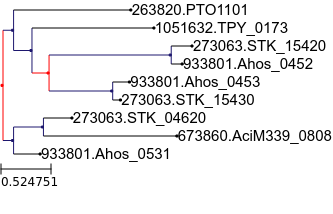

In [3]:
all_trees["933801.Ahos_0453"].render("%%inline")

now that we have inferred all evolutionary events:

### TASK: How many duplication events are per tree? Which is the most duplicated family?



In [4]:
# Count duplications per tree

from collections import Counter
from pprint import pprint

tree2dups = Counter()
for tname, t in all_trees.items():
    for n in t.traverse():
        if getattr(n, "evoltype", None) == "D":
            tree2dups.update([tname])
    
pprint(tree2dups.most_common(5))

    

[('673860.AciM339_0928', 145),
 ('525897.Dbac_1405', 88),
 ('1121405.dsmv_1096', 79),
 ('525897.Dbac_2039', 71),
 ('1051632.TPY_3127', 53)]


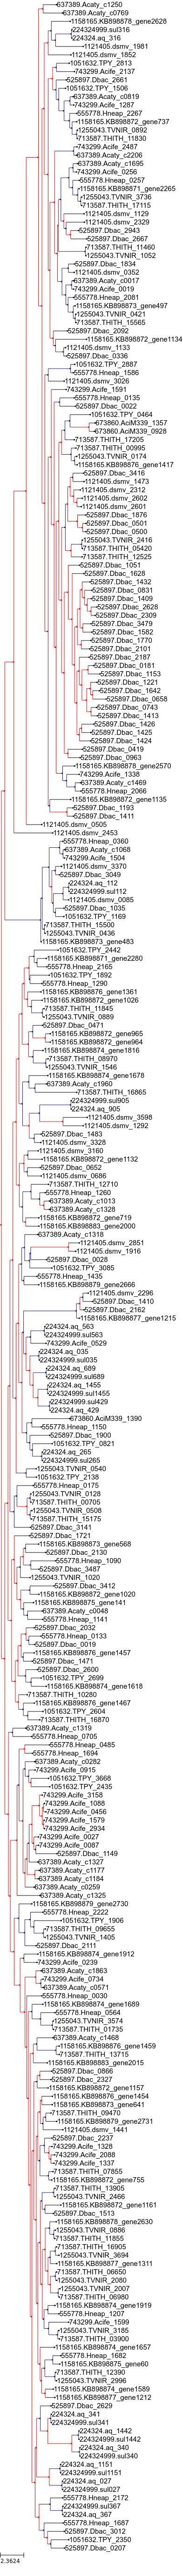

In [5]:
all_trees["673860.AciM339_0928"].render('%%inline')

### TASK How many sp-specific duplications exist in the reference Aquifex?  and in your strain?  

In [6]:
print("In ref Aquifex:")
for tname, t in all_trees.items():
    for n in t.traverse():
        if getattr(n, "evoltype", None) == "D":
            if n.get_species() == set(["224324"]):
                print(tname, n)

print("In aquifex strain:")
for tname, t in all_trees.items():
    for n in t.traverse():
        if getattr(n, "evoltype", None) == "D":
            if n.get_species() == set(["224324999"]):
                print(tname, n)


In ref Aquifex:
In aquifex strain:
224324.aq_1391 
   /-224324999.sul1391
--|
   \-224324999.sul1640
224324999.sul455 
      /-224324999.sul45505
   /-|
  |   \-224324999.sul45501
--|
  |      /-224324999.sul45504
  |   /-|
   \-|   \-224324999.sul45503
     |
      \-224324999.sul455
224324999.sul455 
   /-224324999.sul45505
--|
   \-224324999.sul45501
224324999.sul455 
      /-224324999.sul45504
   /-|
--|   \-224324999.sul45503
  |
   \-224324999.sul455
224324999.sul455 
   /-224324999.sul45504
--|
   \-224324999.sul45503


**Those expansions in your strain look interesting!** Take note of them to continue with our analyses
